# Graph Neural Networks (GNN) for Traffic Congestion Forecasting

## Background Information
Library: Pytorch geometric temporal
The library offers staticGraph temporal signal - store once and update the node and features
dyunamic graph temporal signal -

signal splitting -
gnn layers
datasets for testing


Single shot time series forcasting
Autoregressive time series forecasting

## Installation of Required Libaries

In [4]:
import torch
from IPython.display import clear_output
pt_version = torch.__version__
print(pt_version)

2.1.0+cu121


In [5]:
!pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-${pt_version}.html
!pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-${pt_version}.html
!pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-${pt_version}.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-${pt_version}.html
!pip install torch-geometric
!pip install torch-geometric-temporal
clear_output()

In [11]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=8268a99df02563700e0a837d86a0736e9b36452cd91c03b14e0d8147e2a286b0
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [12]:
!wget https://raw.githubusercontent.com/CUAI/TemporalGCN/master/data/METR-LA.zip -P data

--2024-01-28 04:00:38--  https://raw.githubusercontent.com/CUAI/TemporalGCN/master/data/METR-LA.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-01-28 04:00:39 ERROR 404: Not Found.



In [24]:
!pip install --upgrade certifi
!pip install --upgrade urllib3

import ssl
ssl._create_default_https_context = ssl._create_unverified_context


In [26]:
import numpy as np
from torch_geometric_temporal.dataset import METRLADatasetLoader
loader = METRLADatasetLoader()
dataset = loader.get_dataset(num_timesteps_in=12, num_timesteps_out=12)
print("Dataset type:  ", dataset)
print(next(iter(dataset))) # Show first sample


Dataset type:   <torch_geometric_temporal.signal.static_graph_temporal_signal.StaticGraphTemporalSignal object at 0x7858ac26c700>
Data(x=[207, 2, 12], edge_index=[2, 1722], edge_attr=[1722], y=[207, 12])


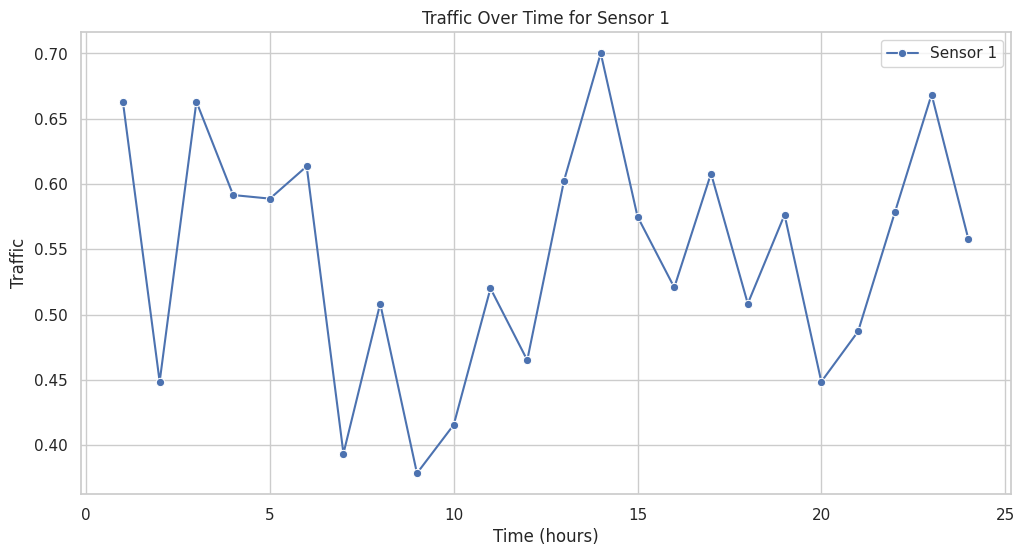

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize traffic over time
sensor_number = 1
hours = 24

# Extract labels for the specified sensor_number
sensor_labels = [bucket.y[sensor_number][0].item() for bucket in list(dataset)[:hours]]

# Create a line plot with different colors for each label
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, hours+1), y=sensor_labels, marker='o', color='b', label=f'Sensor {sensor_number}')

# Add labels and title
plt.xlabel('Time (hours)')
plt.ylabel('Traffic')
plt.title(f'Traffic Over Time for Sensor {sensor_number}')
plt.legend()

# Show the plot
plt.show()


In [32]:
import pandas as pd

# Assuming you have a list of samples from the dataset
samples_list = list(dataset)[:hours]

# Extract relevant information for the table
data = {
    'Sample Index': range(1, hours + 1),
    'Node Features': [sample.x[sensor_number].numpy() for sample in samples_list],
    'Edge Connections': [sample.edge_index.tolist() for sample in samples_list],
    'Target Values': [sample.y[sensor_number][0].item() for sample in samples_list]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)



    Sample Index                                      Node Features  \
0              1  [[0.69398445, 0.74002916, 0.5022464, -2.652154...   
1              2  [[0.74002916, 0.5022464, -2.6521542, -2.652154...   
2              3  [[0.5022464, -2.6521542, -2.6521542, 0.7620205...   
3              4  [[-2.6521542, -2.6521542, 0.7620205, 0.5084314...   
4              5  [[-2.6521542, 0.7620205, 0.50843143, 0.6754291...   
5              6  [[0.7620205, 0.50843143, 0.67542917, 0.5764676...   
6              7  [[0.50843143, 0.67542917, 0.5764676, 0.3909146...   
7              8  [[0.67542917, 0.5764676, 0.3909146, 0.49812302...   
8              9  [[0.5764676, 0.3909146, 0.49812302, 0.70016956...   
9             10  [[0.3909146, 0.49812302, 0.70016956, 0.6630589...   
10            11  [[0.49812302, 0.70016956, 0.66305894, 0.448642...   
11            12  [[0.70016956, 0.66305894, 0.44864222, 0.663058...   
12            13  [[0.66305894, 0.44864222, 0.66305894, 0.591586...   
13    